<a href="https://colab.research.google.com/github/snehapriya259/Projects/blob/main/Malware_Detection_using_Ensemble_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# prompt: read csv from mounted de-rive

import pandas as pd

file_path = '/content/drive/MyDrive/CTU-IoT-Malware-Capture-1-1conn.log.labeled (2).csv'

try:
  df = pd.read_csv(file_path, delimiter='|')
  print(df.head())
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


             ts                 uid        id.orig_h  id.orig_p  \
0  1.525880e+09  CUmrqr4svHuSXJy5z7  192.168.100.103    51524.0   
1  1.525880e+09  CH98aB3s1kJeq6SFOc  192.168.100.103    56305.0   
2  1.525880e+09   C3GBTkINvXNjVGtN5  192.168.100.103    41101.0   
3  1.525880e+09   CDe43c1PtgynajGI6  192.168.100.103    60905.0   
4  1.525880e+09  CJaDcG3MZzvf1YVYI4  192.168.100.103    44301.0   

         id.resp_h  id.resp_p proto service  duration orig_bytes  ...  \
0   65.127.233.163       23.0   tcp       -  2.999051          0  ...   
1    63.150.16.171       23.0   tcp       -         -          -  ...   
2     111.40.23.49       23.0   tcp       -         -          -  ...   
3  131.174.215.147       23.0   tcp       -  2.998796          0  ...   
4      91.42.47.63       23.0   tcp       -         -          -  ...   

  local_resp missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  \
0          -          0.0       S       3.0          180.0       0.0   
1          -  

#import the data

In [ ]:

df.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.525880e+09,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,1.525880e+09,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,1.525880e+09,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,1.525880e+09,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,1.525880e+09,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [ ]:
#To check class imbalance
class_distribution = df['label'].value_counts()

print(class_distribution)


label
Malicious    539473
Benign       469275
Name: count, dtype: int64


In [ ]:
df.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,1.008748e+06,1.008748e+06,1.008748e+06,1008748.0,1.008748e+06,1.008748e+06,1.008748e+06,1.008748e+06
mean,1.526075e+09,4.443684e+04,1.609771e+04,0.0,1.496242e+00,8.114562e+01,1.424647e-01,9.049184e+00
std,1.157431e+05,9.660592e+03,1.956280e+04,0.0,1.741176e+00,9.473090e+01,1.850414e+00,1.196776e+02
min,1.525880e+09,3.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.525975e+09,4.373000e+04,2.300000e+01,0.0,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.526071e+09,4.376300e+04,8.080000e+03,0.0,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
75%,1.526174e+09,4.881400e+04,2.818025e+04,0.0,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
max,1.526283e+09,6.539400e+04,6.553500e+04,0.0,6.000000e+01,2.990000e+03,7.500000e+01,9.415000e+03


In [ ]:

df.drop_duplicates(inplace=True)
print("After:", df.shape)


After: (1008748, 23)


In [ ]:
df.columns

Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd

df.replace('-', np.nan, inplace=True)
df['ts'] = pd.to_datetime(df['ts'], unit='s', errors='coerce')
df.head()

<ipython-input-8-ca45c5312427>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('-', np.nan, inplace=True)


,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,2018-05-09 15:30:31.015810966,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,NaN,2.999051,0,...,NaN,0.0,S,3.0,180.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
1,2018-05-09 15:30:31.025054932,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,NaN,NaN,NaN,...,NaN,0.0,S,1.0,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
2,2018-05-09 15:30:31.045044899,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,NaN,NaN,NaN,...,NaN,0.0,S,1.0,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
3,2018-05-09 15:30:32.016239882,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,NaN,2.998796,0,...,NaN,0.0,S,3.0,180.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan
4,2018-05-09 15:30:32.024985075,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,NaN,NaN,NaN,...,NaN,0.0,S,1.0,60.0,0.0,0.0,NaN,Malicious,PartOfAHorizontalPortScan


In [ ]:
df.isnull().sum()

,0
ts,0
uid,0
id.orig_h,0
id.orig_p,0
id.resp_h,0
id.resp_p,0
proto,0
service,1005507
duration,796300
orig_bytes,796300


In [ ]:

print("Columns in DataFrame:", df.columns)
df.columns = df.columns.str.strip()
df = df.drop(columns=['local_orig', 'local_resp','service','tunnel_parents'], errors='ignore')


Columns in DataFrame: Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')


In [ ]:
df.dtypes

,0
ts,datetime64[ns]
uid,object
id.orig_h,object
id.orig_p,float64
id.resp_h,object
id.resp_p,float64
proto,object
duration,object
orig_bytes,object
resp_bytes,object


In [ ]:

print("Columns in DataFrame:", df.columns)
df.columns = df.columns.str.strip()


numeric_cols = ['duration', 'orig_bytes', 'resp_bytes']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].median())

categorical_cols = ['proto','conn_state']
for col in categorical_cols:
    if col in df.columns and not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode().iloc[0])


df.loc[(df['label'] == 'Benign') & (df['detailed-label'].isna()), 'detailed-label'] = 'Benign'

print("Missing values handled successfully!")


Columns in DataFrame: Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state',
       'missed_bytes', 'history', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'detailed-label'],
      dtype='object')
Missing values handled successfully!


In [ ]:
df.drop(columns=['ts', 'uid', 'id.orig_h','missed_bytes', 'id.resp_h'], inplace=True)


#outlier detection

In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['outlier'] = iso_forest.fit_predict(df[numeric_cols])

outliers = df[df['outlier'] == -1]
print(f"Total outliers detected: {len(outliers)}")


Total outliers detected: 50417


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008748 entries, 0 to 1008747
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   id.orig_p       1008748 non-null  float64
 1   id.resp_p       1008748 non-null  float64
 2   proto           1008748 non-null  object 
 3   duration        1008748 non-null  float64
 4   orig_bytes      1008748 non-null  float64
 5   resp_bytes      1008748 non-null  float64
 6   conn_state      1008748 non-null  object 
 7   history         991327 non-null   object 
 8   orig_pkts       1008748 non-null  float64
 9   orig_ip_bytes   1008748 non-null  float64
 10  resp_pkts       1008748 non-null  float64
 11  resp_ip_bytes   1008748 non-null  float64
 12  label           1008748 non-null  object 
 13  detailed-label  1008748 non-null  object 
 14  outlier         1008748 non-null  int64  
dtypes: float64(9), int64(1), object(5)
memory usage: 115.4+ MB


#Encoding

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

cols_to_encode = ['proto', 'conn_state', 'label', 'detailed-label', 'history']

df['history'] = df['history'].fillna('MISSING')


def entropy_based_encoding(df, cols):
    encoded_df = df.copy()
    for col in cols:
        value_counts = encoded_df[col].value_counts(normalize=True)
        encoding_map = -np.log2(value_counts)
        encoded_df[col] = encoded_df[col].map(encoding_map)
    return encoded_df

encoded_df = entropy_based_encoding(df, cols_to_encode)
print(encoded_df[cols_to_encode].head())


      proto  conn_state     label  detailed-label   history
0  0.790666    0.054682  0.902943        0.902965  0.824532
1  0.790666    0.054682  0.902943        0.902965  0.824532
2  0.790666    0.054682  0.902943        0.902965  0.824532
3  0.790666    0.054682  0.902943        0.902965  0.824532
4  0.790666    0.054682  0.902943        0.902965  0.824532


#Scaling

In [ ]:

encoded_df = entropy_based_encoding(df,cols_to_encode)


orig_numeric =  ['id.orig_p','id.resp_p','duration','orig_bytes','resp_bytes','orig_pkts','outlier','resp_pkts','resp_ip_bytes','orig_ip_bytes']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
encoded_df[orig_numeric] = scaler.fit_transform(encoded_df[orig_numeric])

from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
encoded_df['outlier'] = iso_forest.fit_predict(encoded_df[numeric_cols])


outliers = encoded_df[encoded_df['outlier'] == -1]
print(f"Total outliers detected: {len(outliers)}")

✅ Total outliers detected: 50436


In [ ]:
encoded_df

,id.orig_p,id.resp_p,proto,duration,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,detailed-label,outlier
0,0.733616,-0.821698,0.790666,-0.022157,-0.091909,-0.055016,0.054682,0.824532,0.863646,1.043529,-0.076991,-0.075613,0.902943,0.902965,1
1,1.228513,-0.821698,0.790666,-0.022288,-0.091909,-0.055016,0.054682,0.824532,-0.285004,-0.223218,-0.076991,-0.075613,0.902943,0.902965,1
2,-0.345304,-0.821698,0.790666,-0.022288,-0.091909,-0.055016,0.054682,0.824532,-0.285004,-0.223218,-0.076991,-0.075613,0.902943,0.902965,1
3,1.704675,-0.821698,0.790666,-0.022289,-0.091909,-0.055016,0.054682,0.824532,0.863646,1.043529,-0.076991,-0.075613,0.902943,0.902965,1
4,-0.014062,-0.821698,0.790666,-0.022288,-0.091909,-0.055016,0.054682,0.824532,-0.285004,-0.223218,-0.076991,-0.075613,0.902943,0.902965,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008743,-0.069752,2.494956,1.305242,-0.022288,-0.091909,-0.055016,0.054682,1.328713,-0.285004,-0.434342,-0.076991,-0.075613,1.104060,1.104060,1
1008744,-0.069752,1.192943,1.305242,-0.022288,-0.091909,-0.055016,0.054682,1.328713,-0.285004,-0.434342,-0.076991,-0.075613,1.104060,1.104060,1
1008745,-0.069752,0.514819,1.305242,-0.022288,-0.091909,-0.055016,0.054682,1.328713,-0.285004,-0.434342,-0.076991,-0.075613,1.104060,1.104060,1
1008746,-0.069752,0.109560,1.305242,-0.022288,-0.091909,-0.055016,0.054682,1.328713,-0.285004,-0.434342,-0.076991,-0.075613,1.104060,1.104060,1


In [ ]:
df_cleaned = df[df['outlier'] == 0].reset_index(drop=True)


In [ ]:
print(encoded_df.groupby(['label', 'outlier']).size())


label     outlier
0.902943  -1          39520
           1         499953
1.104060  -1          10916
           1         458359
dtype: int64


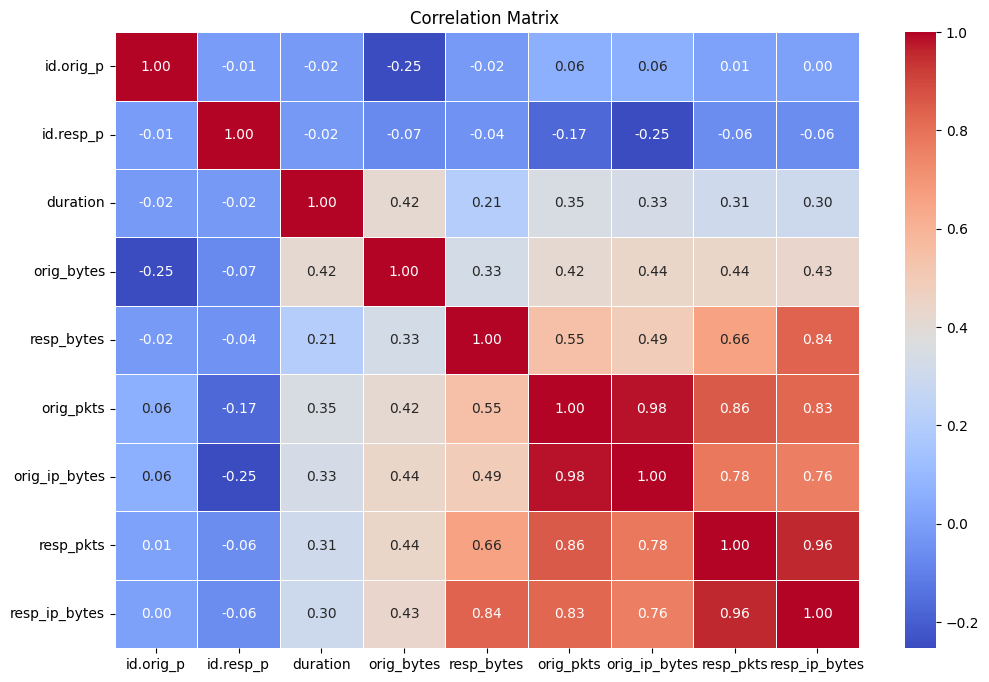

In [ ]:
#correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int32'])
numeric_df = numeric_df.dropna(axis=1, how='all')
numeric_df = numeric_df.loc[:, numeric_df.nunique() > 1]

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix ')
plt.show()


#Data spliting

In [ ]:
from sklearn.model_selection import train_test_split
preprocessed_df = encoded_df.copy()

X = preprocessed_df.drop(columns=['label', 'detailed-label'], errors='ignore')
y = df['label']

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# Final sizes
print("✅ Preprocessing complete. Data ready for model training.")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train.info()



✅ Preprocessing complete. Data ready for model training.
X_train shape: (605248, 13), y_train shape: (605248,)
X_val shape: (201750, 13), y_val shape: (201750,)
X_test shape: (201750, 13), y_test shape: (201750,)
<class 'pandas.core.frame.DataFrame'>
Index: 605248 entries, 163192 to 839896
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id.orig_p      605248 non-null  float64
 1   id.resp_p      605248 non-null  float64
 2   proto          605248 non-null  float64
 3   duration       605248 non-null  float64
 4   orig_bytes     605248 non-null  float64
 5   resp_bytes     605248 non-null  float64
 6   conn_state     605248 non-null  float64
 7   history        605248 non-null  float64
 8   orig_pkts      605248 non-null  float64
 9   orig_ip_bytes  605248 non-null  float64
 10  resp_pkts      605248 non-null  float64
 11  resp_ip_bytes  605248 non-null  float64
 12  outlier        605248 non-null  int64  
d

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     93855
   Malicious       1.00      1.00      1.00    107895

    accuracy                           1.00    201750
   macro avg       1.00      1.00      1.00    201750
weighted avg       1.00      1.00      1.00    201750

Confusion Matrix:
 [[ 93752    103]
 [     7 107888]]
Accuracy Score: 0.999454770755886


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# L1-Regularized Logistic Regression
model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=1.0,
    max_iter=1000,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy Score: 0.9898835192069393
Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      0.98      0.99     93855
   Malicious       0.98      1.00      0.99    107895

    accuracy                           0.99    201750
   macro avg       0.99      0.99      0.99    201750
weighted avg       0.99      0.99      0.99    201750

Confusion Matrix:
 [[ 91822   2033]
 [     8 107887]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f" Training Accuracy: {train_accuracy:.4f}")
print(f" Test Accuracy:     {test_accuracy:.4f}")


✅ Training Accuracy: 1.0000
✅ Test Accuracy:     0.9998


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=11, scoring='accuracy')
print("Cross-validated accuracy:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated accuracy: [0.99948749 0.99965106 0.99969467 0.99967286 0.99955291 0.99958562
 0.99964015 0.99973829 0.99970557 0.99971648 0.99962924]
Mean accuracy: 0.999643122034848


In [ ]:
# Check overlap between training and test sets
train_hashes = pd.util.hash_pandas_object(X_train).values
test_hashes = pd.util.hash_pandas_object(X_test).values

overlap = np.isin(test_hashes, train_hashes).sum()
print(f"Overlapping rows between train and test: {overlap}")


⚠️ Overlapping rows between train and test: 0


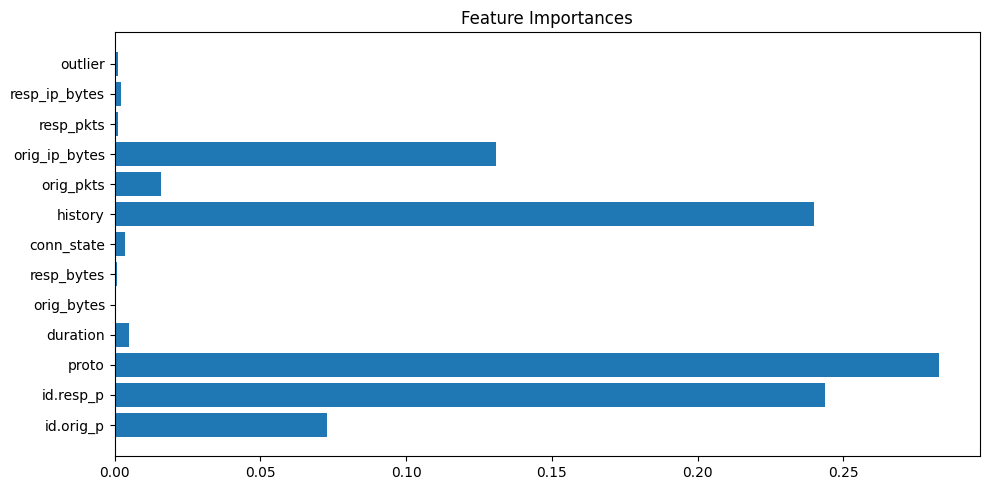

In [ ]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feat_names = X.columns
plt.figure(figsize=(10, 5))
plt.barh(feat_names, importances)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


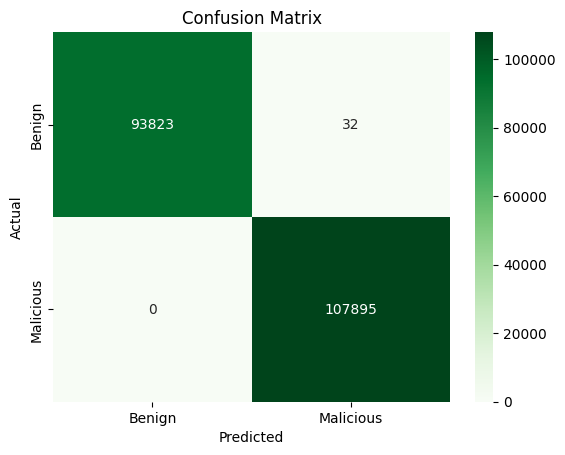

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malicious'], yticklabels=['Benign', 'Malicious'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_val_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f" Validation Accuracy: {accuracy:.4f}")

print("\n Classification Report:")
print(classification_report(y_val, y_val_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


✅ Validation Accuracy: 0.9898

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.98      0.99     93855
   Malicious       0.98      1.00      0.99    107895

    accuracy                           0.99    201750
   macro avg       0.99      0.99      0.99    201750
weighted avg       0.99      0.99      0.99    201750

🧩 Confusion Matrix:
[[ 91796   2059]
 [     8 107887]]


In [ ]:
import pickle

with open('trained_model_rf.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved to 'trained_model.pkl'")

with open('trained_model_rf.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_val)

from google.colab import files

files.download('trained_model_rf.pkl')


✅ Model saved to 'trained_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lgb_model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=152,
    learning_rate= 0.0858982036721082,
    num_leaves=135,
    max_depth=10,
    reg_alpha=0.4606749832862438,
    reg_lambda=0.001344372802637372,
    min_gain_to_split=0.1,
    min_data_in_leaf=95,
    random_state=42,
    n_jobs=-1
)


early_stopping_callback = lgb.early_stopping(stopping_rounds=20, verbose=True)

lgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    callbacks=[early_stopping_callback],
)


y_pred = lgb_model.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Number of positive: 323683, number of negative: 281565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1738
[LightGBM] [Info] Number of data points in the train set: 605248, number of used features: 13
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ign

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 5, 100),
    }
    model = lgb.LGBMClassifier(**params, random_state=42, n_jobs=-1)
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

print("Best trial:", study.best_trial.params)


[I 2025-04-19 04:07:08,880] A new study created in memory with name: no-name-c672f8a0-ea3a-4f5a-bc01-79b83e382da9
<ipython-input-34-52fe89e48835>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1e-1),
<ipython-input-34-52fe89e48835>:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
<ipython-input-34-52fe89e48835>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_lambda': trial.sug

Best trial: {'num_leaves': 87, 'learning_rate': 0.03571399249897918, 'n_estimators': 173, 'reg_alpha': 0.14025459424582395, 'reg_lambda': 0.002364181737781347, 'min_data_in_leaf': 7}


In [ ]:
import pickle

with open('trained_model_lgm.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

print("✅ Model saved to 'trained_model.pkl'")

with open('trained_model_lgm.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_val)

from google.colab import files

files.download('trained_model_lgm.pkl')


✅ Model saved to 'trained_model.pkl'
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_val_pred = lgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_val, y_val_pred))

print("🧩 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
✅ Validation Accuracy: 0.9999

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     93855
   Malicious       1.00      1.00      1.00    107895

    accuracy                           1.00    201750
   macro avg       1.00      1.00      1.00    201750
weighted avg       1.00      1.00      1.00    201750

🧩 Confusion Matrix:
[[ 93847      8]
 [     6 107889]]


#catboosting

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

catboost_model= CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    eval_metric='Accuracy',
    cat_features=cat_features,
    verbose=100,
    random_seed=42
)

model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

y_pred = model.predict(X_test)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


0:	learn: 0.9935878	test: 0.9936258	best: 0.9936258 (0)	total: 161ms	remaining: 1m 20s
100:	learn: 0.9999703	test: 0.9999554	best: 0.9999554 (26)	total: 17.2s	remaining: 1m 7s
200:	learn: 0.9999703	test: 0.9999554	best: 0.9999554 (26)	total: 36.1s	remaining: 53.7s
300:	learn: 0.9999703	test: 0.9999554	best: 0.9999554 (26)	total: 59.7s	remaining: 39.5s
400:	learn: 0.9999703	test: 0.9999554	best: 0.9999554 (26)	total: 1m 37s	remaining: 24s
499:	learn: 0.9999703	test: 0.9999554	best: 0.9999554 (26)	total: 1m 56s	remaining: 0us

bestTest = 0.9999553903
bestIteration = 26

Shrink model to first 27 iterations.

✅ Accuracy: 0.9999553903345725

Classification Report:
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     93855
   Malicious       1.00      1.00      1.00    107895

    accuracy                           1.00    201750
   macro avg       1.00      1.00      1.00    201750
weighted avg       1.00      1.00      1.00    201750

Conf

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'depth': randint(4, 7),
    'learning_rate': uniform(0.03, 0.08),
    'l2_leaf_reg': randint(3, 8),
    'iterations': [200],
    'random_strength': randint(1, 6),
    'bagging_temperature': uniform(0.3, 1.0)
}

random_search = RandomizedSearchCV(
    estimator=model_for_tuning,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
0:	learn: 0.9926344	total: 172ms	remaining: 34.3s
100:	learn: 0.9999703	total: 16.5s	remaining: 16.2s
199:	learn: 0.9999703	total: 31.7s	remaining: 0us


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x7bb9819bea50>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bb97feb15d0>,
                                        'depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen o...90>,
                                        'iterations': [200],
                                        'l2_leaf_reg': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb98185ae50>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7bb98185a610>,
                                        'random_strength': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7bb98185b550>},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
import pickle

with open('trained_model_catb.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("✅ Model saved to 'trained_model.pkl'")

with open('trained_model_catb.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

y_pred = loaded_model.predict(X_val)

from google.colab import files

files.download('trained_model_catb.pkl')


✅ Model saved to 'trained_model.pkl'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_val_pred = best_model.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
print(f"✅ Validation Accuracy: {accuracy:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_val, y_val_pred))

print("🧩 Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))


✅ Validation Accuracy: 1.0000

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     93855
   Malicious       1.00      1.00      1.00    107895

    accuracy                           1.00    201750
   macro avg       1.00      1.00      1.00    201750
weighted avg       1.00      1.00      1.00    201750

🧩 Confusion Matrix:
[[ 93855      0]
 [     8 107887]]


In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201750 entries, 513429 to 686941
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id.orig_p      201750 non-null  float64
 1   id.resp_p      201750 non-null  float64
 2   proto          201750 non-null  float64
 3   duration       201750 non-null  float64
 4   orig_bytes     201750 non-null  float64
 5   resp_bytes     201750 non-null  float64
 6   conn_state     201750 non-null  float64
 7   history        201750 non-null  float64
 8   orig_pkts      201750 non-null  float64
 9   orig_ip_bytes  201750 non-null  float64
 10  resp_pkts      201750 non-null  float64
 11  resp_ip_bytes  201750 non-null  float64
 12  outlier        201750 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 21.5 MB


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    107895
           1       1.00      1.00      1.00     93855

    accuracy                           1.00    201750
   macro avg       1.00      1.00      1.00    201750
weighted avg       1.00      1.00      1.00    201750

Confusion Matrix:
 [[107893      2]
 [     2  93853]]

✅ Accuracy: 0.9999801734820322
